In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df=pd.read_csv("cluster03.csv",index_col=0)

In [7]:
df["lable_cluster"].value_counts()

2    70501
Name: lable_cluster, dtype: int64

In [8]:
# droping unnecessary columns
df.drop(["lable_cluster"],axis=1,inplace=True)

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,2220
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,2311
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,2370
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,2555
4,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,78.0,14.0,7.0,9.0,9.0,12.0,1,1,0,2157


In [11]:
df.shape

(70501, 39)

In [52]:
# For data analysis
from pandas_profiling import ProfileReport
pf=ProfileReport(df)
pf.to_file("report of cluster 2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Drop duplicate row
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
count,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,...,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000,70468.000000
mean,69.521627,73.293992,56.560836,51.407745,58.008557,64.117514,50.534895,61.632060,54.918601,50.451552,...,48.984830,14.228047,13.955654,13.813192,14.043211,14.277232,0.243813,0.383295,0.385622,2518.803670
std,6.358614,6.206226,16.474444,18.293906,15.354133,13.067016,17.395530,16.486842,17.552069,17.260771,...,21.062197,15.654394,14.624200,14.168307,14.964325,16.061147,0.429384,0.579781,0.679699,237.648629
min,40.000000,49.000000,7.000000,5.000000,8.000000,11.000000,5.000000,6.000000,6.000000,4.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2080.000000
25%,65.000000,69.000000,47.000000,36.000000,50.000000,60.000000,37.000000,56.000000,43.000000,37.000000,...,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,2324.000000
50%,70.000000,73.000000,61.000000,55.000000,60.000000,66.000000,53.000000,66.000000,58.000000,51.000000,...,54.000000,11.000000,11.000000,11.000000,10.000000,10.000000,0.000000,0.000000,0.000000,2534.000000
75%,74.000000,78.000000,68.000000,66.000000,68.000000,73.000000,64.000000,73.000000,68.000000,65.000000,...,68.000000,13.000000,13.000000,13.000000,14.000000,13.000000,0.000000,1.000000,1.000000,2724.000000
max,94.000000,97.000000,93.000000,97.000000,95.000000,95.000000,92.000000,97.000000,94.000000,95.000000,...,95.000000,88.000000,87.000000,92.000000,90.000000,90.000000,1.000000,3.000000,4.000000,2940.000000


In [14]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,2220
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,2311
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,2370
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,2555
4,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,78.0,14.0,7.0,9.0,9.0,12.0,1,1,0,2157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70496,61.0,65.0,44.0,25.0,66.0,55.0,20.0,34.0,21.0,24.0,...,53.0,12.0,13.0,11.0,9.0,7.0,1,0,0,2738
70497,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,72.0,14.0,10.0,11.0,8.0,12.0,0,2,0,2569
70498,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,72.0,14.0,10.0,11.0,8.0,12.0,0,2,0,2738
70499,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,72.0,14.0,10.0,11.0,8.0,12.0,0,2,0,2863


In [15]:
#no outlier is here because all rating range between 0 to 100 expect exp no of days
for i in df.columns:
    print(max(df[i]))

94.0
97.0
93.0
97.0
95.0
95.0
92.0
97.0
94.0
95.0
95.0
96.0
97.0
97.0
95.0
96.0
96.0
96.0
96.0
95.0
96.0
93.0
94.0
93.0
94.0
96.0
96.0
91.0
91.0
95.0
88.0
87.0
92.0
90.0
90.0
1
3
4
2940


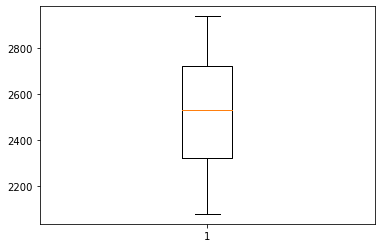

In [16]:
# Creating plot
plt.boxplot(df["experience_no_of_days"])
 
# show plot
plt.show()

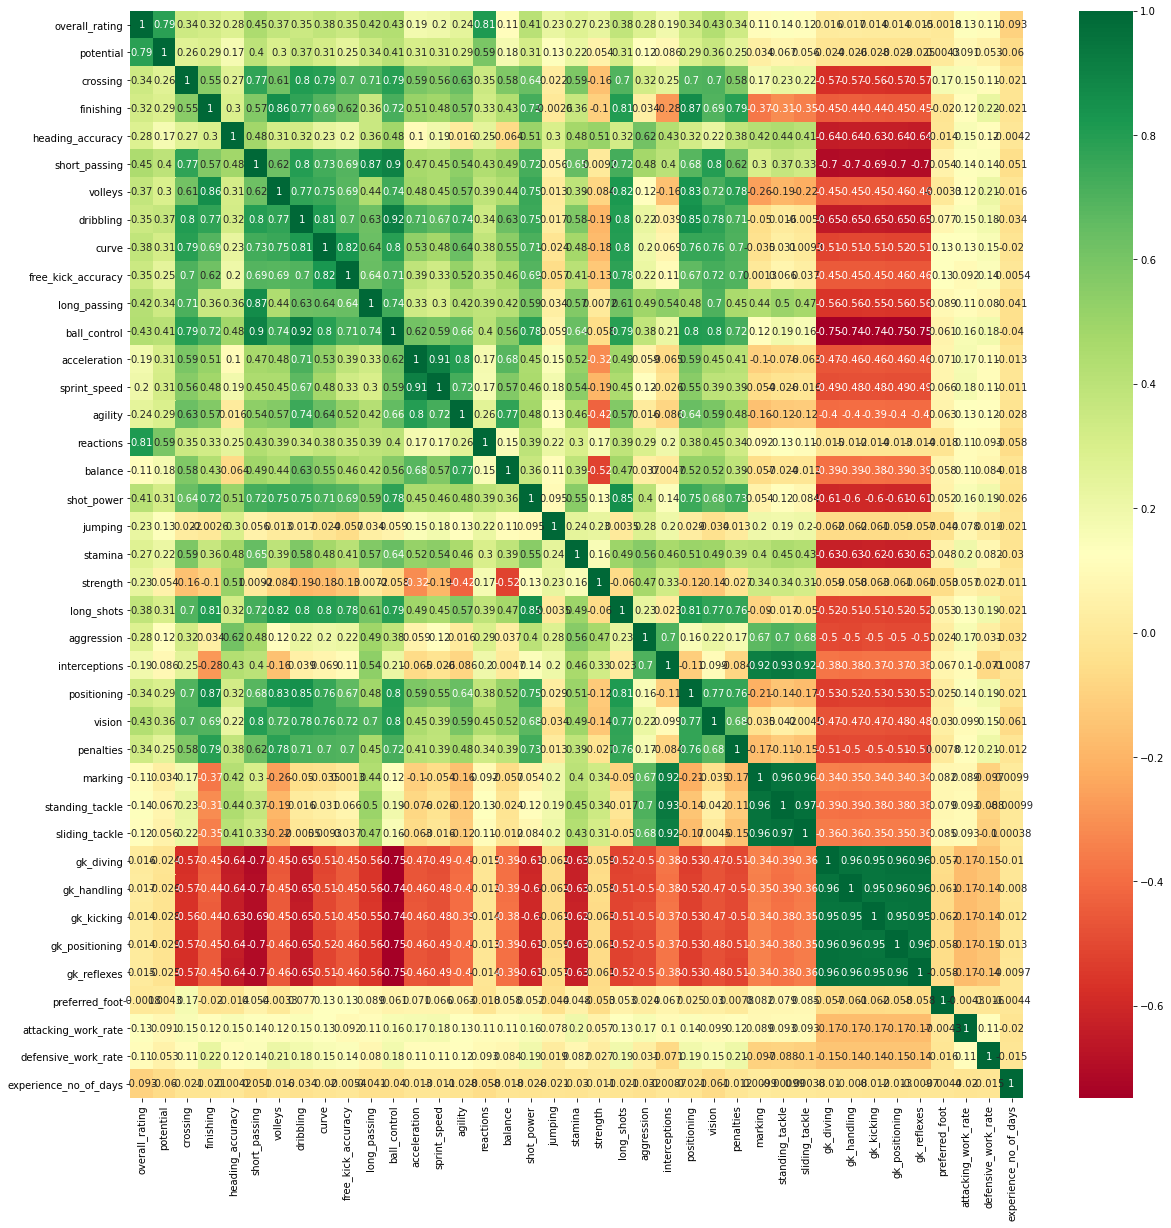

In [61]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('corr_cluster_03.png')

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [18]:
# more than .9 corelation so multicolinearity exist so we drop this column 
corr_features = correlation(df, 0.9)


corr_features

{'ball_control',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'marking',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle'}

In [19]:
len(set(corr_features))

9

In [20]:
df.drop(corr_features,axis=1,inplace=True)

In [21]:
df.shape

(70468, 30)

In [22]:
x=df.drop("overall_rating",axis=1)
y=df["overall_rating"]

In [23]:
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size= 0.2,random_state = 100)

In [46]:
x_train

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
64891,68.0,34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,...,67.0,70.0,29.0,35.0,38.0,5.0,0,0,1,2513
18659,73.0,72.0,60.0,38.0,68.0,54.0,70.0,58.0,69.0,64.0,...,46.0,34.0,66.0,66.0,64.0,8.0,0,0,0,2370
13440,63.0,44.0,46.0,34.0,62.0,40.0,61.0,43.0,45.0,57.0,...,41.0,27.0,49.0,57.0,49.0,11.0,0,0,0,2905
30482,76.0,57.0,62.0,41.0,63.0,41.0,71.0,48.0,56.0,55.0,...,60.0,41.0,55.0,61.0,55.0,15.0,0,1,0,2241
69131,85.0,79.0,58.0,72.0,91.0,71.0,77.0,81.0,83.0,92.0,...,78.0,86.0,79.0,88.0,82.0,7.0,0,0,1,2618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,77.0,62.0,61.0,59.0,81.0,58.0,71.0,66.0,43.0,79.0,...,72.0,72.0,68.0,75.0,52.0,12.0,0,0,0,2171
63403,73.0,58.0,34.0,57.0,54.0,36.0,49.0,45.0,39.0,48.0,...,62.0,64.0,39.0,34.0,41.0,9.0,0,0,0,2688
65648,72.0,69.0,56.0,50.0,65.0,45.0,66.0,76.0,71.0,70.0,...,46.0,36.0,58.0,66.0,63.0,12.0,0,0,0,2171
56121,82.0,75.0,72.0,60.0,75.0,70.0,77.0,64.0,57.0,69.0,...,59.0,69.0,68.0,64.0,36.0,11.0,1,0,1,2534


In [48]:
y_train

64891    68.0
18659    69.0
13440    56.0
30482    60.0
69131    85.0
         ... 
14269    75.0
63403    64.0
65648    65.0
56121    74.0
38417    65.0
Name: overall_rating, Length: 56374, dtype: float64

In [49]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,71.0,70.0,45.0,54.0,48.0,6.0,0,0,0,2220
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,71.0,70.0,45.0,54.0,48.0,6.0,0,0,0,2311
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,63.0,41.0,45.0,54.0,48.0,6.0,0,0,0,2370
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,62.0,40.0,44.0,53.0,47.0,5.0,0,0,0,2555
4,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,68.0,67.0,60.0,66.0,59.0,14.0,1,1,0,2157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70496,61.0,65.0,44.0,25.0,66.0,55.0,20.0,34.0,21.0,24.0,...,60.0,58.0,28.0,32.0,33.0,12.0,1,0,0,2738
70497,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,75.0,66.0,22.0,52.0,50.0,14.0,0,2,0,2569
70498,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,75.0,64.0,22.0,52.0,50.0,14.0,0,2,0,2738
70499,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,75.0,64.0,22.0,52.0,50.0,14.0,0,2,0,2863


In [90]:
#Now you will convert the dataset into an optimized data structure called Dmatrix 
#that XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [28]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [29]:
data_dmatrix

In [32]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[07:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:18

In [33]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,62.405086,0.006986,62.404780,0.062182
1,56.185928,0.009214,56.185362,0.058021
2,50.591790,0.007561,50.590216,0.055761
3,45.557209,0.006742,45.557960,0.055060
4,41.025944,0.010789,41.026064,0.053983


In [89]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,62.405849,0.009656,62.406353,0.020174
1,56.184599,0.009060,56.183897,0.019134
2,50.592310,0.006090,50.591198,0.020088
3,45.554000,0.004227,45.552498,0.019376
4,41.023977,0.005330,41.022494,0.017763


In [90]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1.55085
Name: test-rmse-mean, dtype: float64


In [91]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[09:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


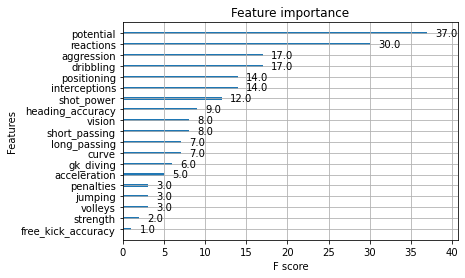

In [19]:
#2nd way

DMatrix is an internal data structure that is used by XGBoost, 
which is optimized for both memory efficiency and training speed. 
You can construct DMatrix from multiple different sources of data.

In [35]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In order to get an idea of the range of MAE we would like to achieve here, we are going to build a baseline model, and save its score for later. This score is what we can achieve with no efforts, so we hope we will beat it with our fancy algorithm.

In [36]:
from sklearn.metrics import mean_absolute_error
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 5.08


In the following, we are going to see methods to tune the main parameters of your XGBoost model. In an ideal world, with infinite resources and where time is not an issue, you could run a giant grid search with all the parameters together and find the optimal solution.
In fact, you might even be able to do that with really small datasets, but as the data grows bigger, training time grows too, and each step in the tuning process becomes more expensive. For this reason it is important to understand the role of the parameters and focus on the steps that we expect to impact our results the most. Here we will tune 6 of the hyperparameters that are usually having a big impact on performance. Whilst, again, it would be necessary to test all combinations to ensure we find THE optimal solution, our goal here is to find a good enough one by improving our out-of-the-box model with as few steps as possible.

In [27]:
#link for parameter in  Xgboost-->
#  https://xgboost.readthedocs.io/en/latest/parameter.html

In [37]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

Parameters num_boost_round and early_stopping_rounds
The first parameter we will look at is not part of the params dictionary, but will be passed as a standalone argument to the training method. This parameter is called num_boost_round and corresponds to the number of boosting rounds or trees to build. Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter. You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.
Fortunately XGBoost provides a nice way to find the best number of rounds whilst training. Since trees are built sequentially, instead of fixing the number of rounds at the beginning, we can test our model at each step and see if adding a new tree/round improves performance.
To do so, we define a test dataset and a metric that is used to assess performance at each round. If performance haven’t improved for N rounds (N is defined by the variable early_stopping_round), we stop the training and keep the best number of boosting rounds. Let's see how to use it.

First, we need to add the evaluation metric we are interested in to our params dictionary.

In [38]:
params['eval_metric'] = "mae"

We still need to pass a num_boost_round which corresponds to the maximum number of boosting rounds that we allow. We set it to a large value hoping to find the optimal number of rounds before reaching it, if we haven't improved performance on our test dataset in early_stopping_round rounds

In [39]:
num_boost_round = 10000

In order to automatically find the best number of boosting rounds, 
we need to pass extra parameters on top of the params dictionary, the training DMatrix and num_boost_round:

evals: a list of pairs (test_dmatrix, name_of_test). Here we will use our dtest DMatrix.

early_stopping_rounds: The number of rounds without improvements after which we should stop, here we set it to 10.

In [38]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:48.27289
[1]	Test-mae:33.81200
[2]	Test-mae:23.68745
[3]	Test-mae:16.59389
[4]	Test-mae:11.63163
[5]	Test-mae:8.15881
[6]	Test-mae:5.73825
[7]	Test-mae:4.07406
[8]	Test-mae:2.95529
[9]	Test-mae:2.22776
[10]	Test-mae:1.77493
[11]	Test-mae:1.49103
[12]	Test-mae:1.32507
[13]	Test-mae:1.22297
[14]	Test-mae:1.16047
[15]	Test-mae:1.12210
[16]	Test-mae:1.09115
[17]	Test-mae:1.06646
[18]	Test-mae:1.04782
[19]	Test-mae:1.03285
[20]	Test-mae:1.01793
[21]	Test-mae:1.00769
[22]	Test-mae:1.00025
[23]	Test-mae:0.99071
[24]	Test-mae:0.98572
[25]	Test-mae:0.97783
[26]	Test-mae:0.97301
[27]	Test-mae:0.96615
[28]	Test-mae:0.96080
[29]	Test-mae:0.95437
[30]	Test-mae:0.95240
[31]	Test-mae:0.94588
[32]	Test-mae:0.93959
[33]	Test-mae:0.93782
[34]	Test-mae:0.93254
[35]	Test-mae:0.92697
[36]	Test-mae:0.92331
[37]	Test-mae:

[354]	Test-mae:0.52589
[355]	Test-mae:0.52519
[356]	Test-mae:0.52476
[357]	Test-mae:0.52444
[358]	Test-mae:0.52389
[359]	Test-mae:0.52372
[360]	Test-mae:0.52343
[361]	Test-mae:0.52262
[362]	Test-mae:0.52243
[363]	Test-mae:0.52202
[364]	Test-mae:0.52177
[365]	Test-mae:0.52161
[366]	Test-mae:0.52137
[367]	Test-mae:0.52086
[368]	Test-mae:0.52025
[369]	Test-mae:0.51984
[370]	Test-mae:0.51947
[371]	Test-mae:0.51896
[372]	Test-mae:0.51859
[373]	Test-mae:0.51825
[374]	Test-mae:0.51796
[375]	Test-mae:0.51771
[376]	Test-mae:0.51728
[377]	Test-mae:0.51668
[378]	Test-mae:0.51606
[379]	Test-mae:0.51560
[380]	Test-mae:0.51531
[381]	Test-mae:0.51490
[382]	Test-mae:0.51454
[383]	Test-mae:0.51382
[384]	Test-mae:0.51337
[385]	Test-mae:0.51317
[386]	Test-mae:0.51282
[387]	Test-mae:0.51256
[388]	Test-mae:0.51209
[389]	Test-mae:0.51180
[390]	Test-mae:0.51157
[391]	Test-mae:0.51127
[392]	Test-mae:0.51060
[393]	Test-mae:0.51042
[394]	Test-mae:0.50987
[395]	Test-mae:0.50953
[396]	Test-mae:0.50876
[397]	Test-

[711]	Test-mae:0.43970
[712]	Test-mae:0.43968
[713]	Test-mae:0.43968
[714]	Test-mae:0.43951
[715]	Test-mae:0.43942
[716]	Test-mae:0.43923
[717]	Test-mae:0.43883
[718]	Test-mae:0.43878
[719]	Test-mae:0.43866
[720]	Test-mae:0.43850
[721]	Test-mae:0.43834
[722]	Test-mae:0.43822
[723]	Test-mae:0.43789
[724]	Test-mae:0.43787
[725]	Test-mae:0.43773
[726]	Test-mae:0.43768
[727]	Test-mae:0.43754
[728]	Test-mae:0.43751
[729]	Test-mae:0.43748
[730]	Test-mae:0.43749
[731]	Test-mae:0.43731
[732]	Test-mae:0.43717
[733]	Test-mae:0.43693
[734]	Test-mae:0.43680
[735]	Test-mae:0.43672
[736]	Test-mae:0.43661
[737]	Test-mae:0.43648
[738]	Test-mae:0.43624
[739]	Test-mae:0.43614
[740]	Test-mae:0.43606
[741]	Test-mae:0.43595
[742]	Test-mae:0.43588
[743]	Test-mae:0.43561
[744]	Test-mae:0.43545
[745]	Test-mae:0.43539
[746]	Test-mae:0.43520
[747]	Test-mae:0.43511
[748]	Test-mae:0.43505
[749]	Test-mae:0.43486
[750]	Test-mae:0.43479
[751]	Test-mae:0.43468
[752]	Test-mae:0.43458
[753]	Test-mae:0.43453
[754]	Test-

[1065]	Test-mae:0.40784
[1066]	Test-mae:0.40765
[1067]	Test-mae:0.40752
[1068]	Test-mae:0.40740
[1069]	Test-mae:0.40731
[1070]	Test-mae:0.40730
[1071]	Test-mae:0.40723
[1072]	Test-mae:0.40722
[1073]	Test-mae:0.40709
[1074]	Test-mae:0.40709
[1075]	Test-mae:0.40697
[1076]	Test-mae:0.40679
[1077]	Test-mae:0.40674
[1078]	Test-mae:0.40668
[1079]	Test-mae:0.40662
[1080]	Test-mae:0.40656
[1081]	Test-mae:0.40650
[1082]	Test-mae:0.40631
[1083]	Test-mae:0.40618
[1084]	Test-mae:0.40616
[1085]	Test-mae:0.40615
[1086]	Test-mae:0.40606
[1087]	Test-mae:0.40598
[1088]	Test-mae:0.40596
[1089]	Test-mae:0.40593
[1090]	Test-mae:0.40587
[1091]	Test-mae:0.40576
[1092]	Test-mae:0.40574
[1093]	Test-mae:0.40574
[1094]	Test-mae:0.40572
[1095]	Test-mae:0.40564
[1096]	Test-mae:0.40562
[1097]	Test-mae:0.40557
[1098]	Test-mae:0.40552
[1099]	Test-mae:0.40543
[1100]	Test-mae:0.40530
[1101]	Test-mae:0.40525
[1102]	Test-mae:0.40518
[1103]	Test-mae:0.40516
[1104]	Test-mae:0.40514
[1105]	Test-mae:0.40515
[1106]	Test-mae:

[1407]	Test-mae:0.39120
[1408]	Test-mae:0.39120
[1409]	Test-mae:0.39113
[1410]	Test-mae:0.39115
[1411]	Test-mae:0.39113
[1412]	Test-mae:0.39116
[1413]	Test-mae:0.39110
[1414]	Test-mae:0.39104
[1415]	Test-mae:0.39105
[1416]	Test-mae:0.39100
[1417]	Test-mae:0.39095
[1418]	Test-mae:0.39087
[1419]	Test-mae:0.39082
[1420]	Test-mae:0.39081
[1421]	Test-mae:0.39078
[1422]	Test-mae:0.39075
[1423]	Test-mae:0.39075
[1424]	Test-mae:0.39074
[1425]	Test-mae:0.39071
[1426]	Test-mae:0.39069
[1427]	Test-mae:0.39066
[1428]	Test-mae:0.39063
[1429]	Test-mae:0.39058
[1430]	Test-mae:0.39057
[1431]	Test-mae:0.39051
[1432]	Test-mae:0.39050
[1433]	Test-mae:0.39043
[1434]	Test-mae:0.39045
[1435]	Test-mae:0.39041
[1436]	Test-mae:0.39039
[1437]	Test-mae:0.39035
[1438]	Test-mae:0.39033
[1439]	Test-mae:0.39027
[1440]	Test-mae:0.39022
[1441]	Test-mae:0.39021
[1442]	Test-mae:0.39017
[1443]	Test-mae:0.39010
[1444]	Test-mae:0.39005
[1445]	Test-mae:0.39004
[1446]	Test-mae:0.38998
[1447]	Test-mae:0.38994
[1448]	Test-mae:

[1749]	Test-mae:0.38141
[1750]	Test-mae:0.38137
[1751]	Test-mae:0.38134
[1752]	Test-mae:0.38131
[1753]	Test-mae:0.38131
[1754]	Test-mae:0.38127
[1755]	Test-mae:0.38124
[1756]	Test-mae:0.38121
[1757]	Test-mae:0.38121
[1758]	Test-mae:0.38121
[1759]	Test-mae:0.38120
[1760]	Test-mae:0.38119
[1761]	Test-mae:0.38117
[1762]	Test-mae:0.38118
[1763]	Test-mae:0.38114
[1764]	Test-mae:0.38109
[1765]	Test-mae:0.38105
[1766]	Test-mae:0.38101
[1767]	Test-mae:0.38099
[1768]	Test-mae:0.38093
[1769]	Test-mae:0.38091
[1770]	Test-mae:0.38090
[1771]	Test-mae:0.38086
[1772]	Test-mae:0.38084
[1773]	Test-mae:0.38082
[1774]	Test-mae:0.38083
[1775]	Test-mae:0.38078
[1776]	Test-mae:0.38078
[1777]	Test-mae:0.38072
[1778]	Test-mae:0.38075
[1779]	Test-mae:0.38074
[1780]	Test-mae:0.38075
[1781]	Test-mae:0.38072
[1782]	Test-mae:0.38071
[1783]	Test-mae:0.38063
[1784]	Test-mae:0.38055
[1785]	Test-mae:0.38050
[1786]	Test-mae:0.38045
[1787]	Test-mae:0.38044
[1788]	Test-mae:0.38043
[1789]	Test-mae:0.38035
[1790]	Test-mae:

[2091]	Test-mae:0.37556
[2092]	Test-mae:0.37556
[2093]	Test-mae:0.37554
[2094]	Test-mae:0.37552
[2095]	Test-mae:0.37552
[2096]	Test-mae:0.37552
[2097]	Test-mae:0.37551
[2098]	Test-mae:0.37549
[2099]	Test-mae:0.37548
[2100]	Test-mae:0.37546
[2101]	Test-mae:0.37544
[2102]	Test-mae:0.37543
[2103]	Test-mae:0.37542
[2104]	Test-mae:0.37541
[2105]	Test-mae:0.37540
[2106]	Test-mae:0.37540
[2107]	Test-mae:0.37538
[2108]	Test-mae:0.37541
[2109]	Test-mae:0.37538
[2110]	Test-mae:0.37536
[2111]	Test-mae:0.37536
[2112]	Test-mae:0.37535
[2113]	Test-mae:0.37534
[2114]	Test-mae:0.37532
[2115]	Test-mae:0.37532
[2116]	Test-mae:0.37532
[2117]	Test-mae:0.37533
[2118]	Test-mae:0.37531
[2119]	Test-mae:0.37531
[2120]	Test-mae:0.37532
[2121]	Test-mae:0.37534
[2122]	Test-mae:0.37531
[2123]	Test-mae:0.37532
[2124]	Test-mae:0.37530
[2125]	Test-mae:0.37528
[2126]	Test-mae:0.37528
[2127]	Test-mae:0.37528
[2128]	Test-mae:0.37522
[2129]	Test-mae:0.37519
[2130]	Test-mae:0.37520
[2131]	Test-mae:0.37512
[2132]	Test-mae:

[2433]	Test-mae:0.37147
[2434]	Test-mae:0.37145
[2435]	Test-mae:0.37144
[2436]	Test-mae:0.37145
[2437]	Test-mae:0.37143
[2438]	Test-mae:0.37141
[2439]	Test-mae:0.37142
[2440]	Test-mae:0.37139
[2441]	Test-mae:0.37139
[2442]	Test-mae:0.37136
[2443]	Test-mae:0.37136
[2444]	Test-mae:0.37137
[2445]	Test-mae:0.37137
[2446]	Test-mae:0.37135
[2447]	Test-mae:0.37132
[2448]	Test-mae:0.37134
[2449]	Test-mae:0.37133
[2450]	Test-mae:0.37133
[2451]	Test-mae:0.37133
[2452]	Test-mae:0.37133
[2453]	Test-mae:0.37131
[2454]	Test-mae:0.37131
[2455]	Test-mae:0.37129
[2456]	Test-mae:0.37125
[2457]	Test-mae:0.37124
[2458]	Test-mae:0.37122
[2459]	Test-mae:0.37119
[2460]	Test-mae:0.37119
[2461]	Test-mae:0.37119
[2462]	Test-mae:0.37117
[2463]	Test-mae:0.37115
[2464]	Test-mae:0.37112
[2465]	Test-mae:0.37110
[2466]	Test-mae:0.37110
[2467]	Test-mae:0.37108
[2468]	Test-mae:0.37105
[2469]	Test-mae:0.37105
[2470]	Test-mae:0.37104
[2471]	Test-mae:0.37103
[2472]	Test-mae:0.37100
[2473]	Test-mae:0.37098
[2474]	Test-mae:

In [39]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 0.37 with 2500 rounds


As you can see we stopped before reaching the maximum number of boosting rounds, that’s because after the 7th tree, adding more rounds did not lead to improvements of MAE on the test dataset.
Let’s keep this MAE in mind for later, this is the MAE of our model with default parameters and an optimal number of boosting rounds, on the test dataset. As you can see, we are already beating the baseline.

Using XGBoost’s CV
In order to tune the other hyperparameters, we will use the cv function from XGBoost. 
It allows us to run cross-validation on our training dataset and returns a mean MAE score.

We need to pass it:

1>params: our dictionary of parameters.
2>our dtrain matrix.
3>num_boost_round: number of boosting rounds. Here we will use a large number again and 
count on early_stopping_rounds to find the optimal number of rounds before reaching the maximum.

4>seed: random seed. It's important to set a seed here, to ensure we are using the same folds for each step so we can properly compare the scores with different parameters.

5>nfold: the number of folds to use for cross-validation

6>metrics: the metrics to use to evaluate our model, here we use MAE.

    As you can see, we don’t need to pass a test dataset here. It’s because the cross-validation function is splitting the train dataset into nfolds and iteratively keeps one of the folds for test purposes. You can read more about it here.
Let’s see what cross-validation score we get with our current parameters:

In [40]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,48.339093,0.009635,48.340826,0.039053
1,33.846453,0.006455,33.850548,0.030064
2,23.699064,0.004346,23.703255,0.023266
3,16.595317,0.002927,16.599264,0.021798
4,11.621706,0.001901,11.626372,0.019541
...,...,...,...,...
3574,0.027271,0.000410,0.418802,0.007399
3575,0.027256,0.000409,0.418802,0.007400
3576,0.027238,0.000414,0.418800,0.007400
3577,0.027224,0.000414,0.418799,0.007401


In [41]:
cv_results['test-mae-mean'].min()

0.418794

In [42]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [43]:
gridsearch_params

[(9, 5), (9, 6), (9, 7), (10, 5), (10, 6), (10, 7), (11, 5), (11, 6), (11, 7)]

In [45]:
min_mae = float("Inf")

In [46]:
min_mae

inf

In [47]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[17:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.43112019999999995 for 1422 rounds
CV with max_depth=9, min_child_wei

[19:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.4369884 for 880 rounds
Best params: 9, 6, MAE: 0.430776


In [40]:
params['max_depth'] = 9
params['min_child_weight'] = 6

In [50]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [51]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[08:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [57]:
params['subsample'] = .8
params['colsample_bytree'] = 1.

In [64]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)

     
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
[08:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[08:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

KeyError: 'test-mae-mean'

In [42]:
params['eta'] = .01

In [43]:
params

{'max_depth': 9,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 0.8,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [65]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[08:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:48.27696
[1]	Test-mae:33.81710
[2]	Test-mae:23.69511
[3]	Test-mae:16.60817
[4]	Test-mae:11.63896
[5]	Test-mae:8.16362
[6]	Test-mae:5.73210
[7]	Test-mae:4.04882
[8]	Test-mae:2.90648
[9]	Test-mae:2.14621
[10]	Test-mae:1.66007
[11]	Test-mae:1.34911
[12]	Test-mae:1.15096
[13]	Test-mae:1.03568
[14]	Test-mae:0.96721
[15]	Test-mae:0.91765
[16]	Test-mae:0.88445
[17]	Test-mae:0.86468
[18]	Test-mae:0.84547
[19]	Test-mae:0.83182
[20]	Test-mae:0.82038
[21]	Test-mae:0.80735
[22]	Test-mae:0.79278
[23]	Test-mae:0.78436
[24]	Test-mae:0.77972
[25]	Test-mae:0.76905
[26]	Test-mae:0.76297
[27]	Test-mae:0.75431
[28]	Test-mae:0.74639
[29]	Test-mae:0.73979
[30]	Test-mae:0.72964
[31]	Test-mae:0.72177
[32]	Test-mae:0.71531
[33]	Test-mae:0.71035
[34]	Test-mae:0.70720
[35]	Test-mae:0.70304
[36]	Test-mae:0.69627
[37]	Test-mae:

[354]	Test-mae:0.40442
[355]	Test-mae:0.40439
[356]	Test-mae:0.40426
[357]	Test-mae:0.40415
[358]	Test-mae:0.40405
[359]	Test-mae:0.40396
[360]	Test-mae:0.40385
[361]	Test-mae:0.40382
[362]	Test-mae:0.40377
[363]	Test-mae:0.40363
[364]	Test-mae:0.40350
[365]	Test-mae:0.40331
[366]	Test-mae:0.40328
[367]	Test-mae:0.40320
[368]	Test-mae:0.40303
[369]	Test-mae:0.40285
[370]	Test-mae:0.40261
[371]	Test-mae:0.40251
[372]	Test-mae:0.40235
[373]	Test-mae:0.40233
[374]	Test-mae:0.40224
[375]	Test-mae:0.40213
[376]	Test-mae:0.40210
[377]	Test-mae:0.40201
[378]	Test-mae:0.40190
[379]	Test-mae:0.40187
[380]	Test-mae:0.40176
[381]	Test-mae:0.40165
[382]	Test-mae:0.40162
[383]	Test-mae:0.40159
[384]	Test-mae:0.40163
[385]	Test-mae:0.40164
[386]	Test-mae:0.40164
[387]	Test-mae:0.40153
[388]	Test-mae:0.40136
[389]	Test-mae:0.40123
[390]	Test-mae:0.40125
[391]	Test-mae:0.40112
[392]	Test-mae:0.40111
[393]	Test-mae:0.40093
[394]	Test-mae:0.40088
[395]	Test-mae:0.40073
[396]	Test-mae:0.40069
[397]	Test-

[711]	Test-mae:0.38800
[712]	Test-mae:0.38798
[713]	Test-mae:0.38797
[714]	Test-mae:0.38798
[715]	Test-mae:0.38796
[716]	Test-mae:0.38792
[717]	Test-mae:0.38785
[718]	Test-mae:0.38781
[719]	Test-mae:0.38782
[720]	Test-mae:0.38776
[721]	Test-mae:0.38778
[722]	Test-mae:0.38772
[723]	Test-mae:0.38771
[724]	Test-mae:0.38769
[725]	Test-mae:0.38766
[726]	Test-mae:0.38764
[727]	Test-mae:0.38762
[728]	Test-mae:0.38760
[729]	Test-mae:0.38759
[730]	Test-mae:0.38758
[731]	Test-mae:0.38754
[732]	Test-mae:0.38754
[733]	Test-mae:0.38751
[734]	Test-mae:0.38755
[735]	Test-mae:0.38754
[736]	Test-mae:0.38748
[737]	Test-mae:0.38747
[738]	Test-mae:0.38745
[739]	Test-mae:0.38742
[740]	Test-mae:0.38740
[741]	Test-mae:0.38738
[742]	Test-mae:0.38738
[743]	Test-mae:0.38737
[744]	Test-mae:0.38737
[745]	Test-mae:0.38735
[746]	Test-mae:0.38729
[747]	Test-mae:0.38731
[748]	Test-mae:0.38728
[749]	Test-mae:0.38725
[750]	Test-mae:0.38726
[751]	Test-mae:0.38725
[752]	Test-mae:0.38721
[753]	Test-mae:0.38719
[754]	Test-

In [66]:
num_boost_round = model.best_iteration + 1

In [67]:
num_boost_round

988

In [83]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")])

[08:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:48.27696
[1]	Test-mae:33.81710
[2]	Test-mae:23.69511
[3]	Test-mae:16.60817
[4]	Test-mae:11.63896
[5]	Test-mae:8.16362
[6]	Test-mae:5.73210
[7]	Test-mae:4.04882
[8]	Test-mae:2.90648
[9]	Test-mae:2.14621
[10]	Test-mae:1.66007
[11]	Test-mae:1.34911
[12]	Test-mae:1.15096
[13]	Test-mae:1.03568
[14]	Test-mae:0.96721
[15]	Test-mae:0.91765
[16]	Test-mae:0.88445
[17]	Test-mae:0.86468
[18]	Test-mae:0.84547
[19]	Test-mae:0.83182
[20]	Test-mae:0.82038
[21]	Test-mae:0.80735
[22]	Test-mae:0.79278
[23]	Test-mae:0.78436
[24]	Test-mae:0.77972
[25]	Test-mae:0.76905
[26]	Test-mae:0.76297
[27]	Test-mae:0.75431
[28]	Test-mae:0.74639
[29]	Test-mae:0.73979
[30]	Test-mae:0.72964
[31]	Test-mae:0.72177
[32]	Test-mae:0.71531
[33]	Test-mae:0.71035
[34]	Test-mae:0.70720
[35]	Test-mae:0.70304
[36]	Test-mae:0.69627
[37]	Test-mae:

[354]	Test-mae:0.40442
[355]	Test-mae:0.40439
[356]	Test-mae:0.40426
[357]	Test-mae:0.40415
[358]	Test-mae:0.40405
[359]	Test-mae:0.40396
[360]	Test-mae:0.40385
[361]	Test-mae:0.40382
[362]	Test-mae:0.40377
[363]	Test-mae:0.40363
[364]	Test-mae:0.40350
[365]	Test-mae:0.40331
[366]	Test-mae:0.40328
[367]	Test-mae:0.40320
[368]	Test-mae:0.40303
[369]	Test-mae:0.40285
[370]	Test-mae:0.40261
[371]	Test-mae:0.40251
[372]	Test-mae:0.40235
[373]	Test-mae:0.40233
[374]	Test-mae:0.40224
[375]	Test-mae:0.40213
[376]	Test-mae:0.40210
[377]	Test-mae:0.40201
[378]	Test-mae:0.40190
[379]	Test-mae:0.40187
[380]	Test-mae:0.40176
[381]	Test-mae:0.40165
[382]	Test-mae:0.40162
[383]	Test-mae:0.40159
[384]	Test-mae:0.40163
[385]	Test-mae:0.40164
[386]	Test-mae:0.40164
[387]	Test-mae:0.40153
[388]	Test-mae:0.40136
[389]	Test-mae:0.40123
[390]	Test-mae:0.40125
[391]	Test-mae:0.40112
[392]	Test-mae:0.40111
[393]	Test-mae:0.40093
[394]	Test-mae:0.40088
[395]	Test-mae:0.40073
[396]	Test-mae:0.40069
[397]	Test-

[711]	Test-mae:0.38800
[712]	Test-mae:0.38798
[713]	Test-mae:0.38797
[714]	Test-mae:0.38798
[715]	Test-mae:0.38796
[716]	Test-mae:0.38792
[717]	Test-mae:0.38785
[718]	Test-mae:0.38781
[719]	Test-mae:0.38782
[720]	Test-mae:0.38776
[721]	Test-mae:0.38778
[722]	Test-mae:0.38772
[723]	Test-mae:0.38771
[724]	Test-mae:0.38769
[725]	Test-mae:0.38766
[726]	Test-mae:0.38764
[727]	Test-mae:0.38762
[728]	Test-mae:0.38760
[729]	Test-mae:0.38759
[730]	Test-mae:0.38758
[731]	Test-mae:0.38754
[732]	Test-mae:0.38754
[733]	Test-mae:0.38751
[734]	Test-mae:0.38755
[735]	Test-mae:0.38754
[736]	Test-mae:0.38748
[737]	Test-mae:0.38747
[738]	Test-mae:0.38745
[739]	Test-mae:0.38742
[740]	Test-mae:0.38740
[741]	Test-mae:0.38738
[742]	Test-mae:0.38738
[743]	Test-mae:0.38737
[744]	Test-mae:0.38737
[745]	Test-mae:0.38735
[746]	Test-mae:0.38729
[747]	Test-mae:0.38731
[748]	Test-mae:0.38728
[749]	Test-mae:0.38725
[750]	Test-mae:0.38726
[751]	Test-mae:0.38725
[752]	Test-mae:0.38721
[753]	Test-mae:0.38719
[754]	Test-

In [93]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.3842731263090469

In [81]:
best_model.predict([[34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,70.0,65.0,61.0,60.0,30.0,85.0,75.0,80.0,25.0,67.0,70.0,29.0,35.0,38.0,5.0,0.0,0.0,1.0,2513.0]])

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'list'>)

In [76]:
x_train.iloc[0].tolist()

[68.0,
 34.0,
 21.0,
 61.0,
 45.0,
 33.0,
 45.0,
 30.0,
 24.0,
 51.0,
 70.0,
 65.0,
 61.0,
 60.0,
 30.0,
 85.0,
 75.0,
 80.0,
 25.0,
 67.0,
 70.0,
 29.0,
 35.0,
 38.0,
 5.0,
 0.0,
 0.0,
 1.0,
 2513.0]

In [112]:
x_train.shape

(56374, 29)

In [109]:
l=[34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,70.0,65.0,61.0,60.0,30.0,85.0,75.0,80.0,25.0,67.0,70.0,29.0,35.0,38.0,5.0,0.0,0.0,1.0,2513.0]

In [108]:
best_model.inplace_predict(numpy.array([l]))

ValueError: Feature shape mismatch, expected: 29, got 28

In [106]:
numpy.array([[l]])

array([[[3.400e+01, 2.100e+01, 6.100e+01, 4.500e+01, 3.300e+01,
         4.500e+01, 3.000e+01, 2.400e+01, 5.100e+01, 7.000e+01,
         6.500e+01, 6.100e+01, 6.000e+01, 3.000e+01, 8.500e+01,
         7.500e+01, 8.000e+01, 2.500e+01, 6.700e+01, 7.000e+01,
         2.900e+01, 3.500e+01, 3.800e+01, 5.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 2.513e+03]]])

In [105]:
array([[4.9, 3. , 1.4, 0.2]])

NameError: name 'array' is not defined

In [1]:
#final model building

In [64]:
import xgboost as xgb

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [65]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# model = XGBRegressor()

In [66]:
xg_reg=model.fit(x_train, y_train)

In [67]:
print("train score",xg_reg.score(x_train, y_train)) 

train score 0.9803307005473421


In [59]:
scores = cross_val_score(xg_reg, x_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.97


In [68]:
ypred = xg_reg.predict(x_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 1.03
RMSE: 1.01


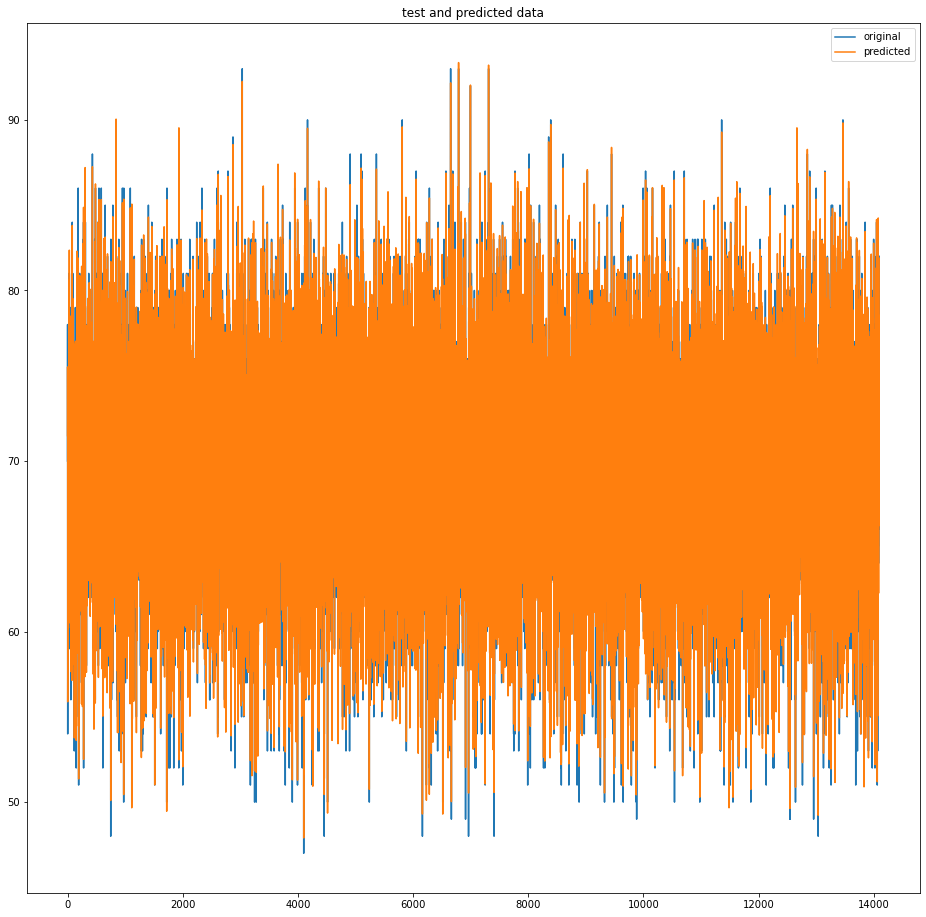

In [38]:
plt. figure(figsize=(16,16))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

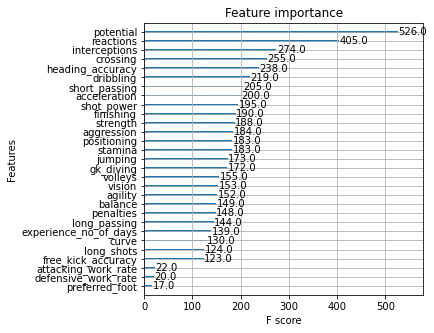

In [70]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [73]:
xgb.predict([[68.0,34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,70.0,65.0,61.0,60.0,30.0,85.0,75.0,80.0,25.0,67.0,70.0,29.0,35.0,38.0,5.0,0.0,0.0,1.0,2513.0]])

AttributeError: module 'xgboost' has no attribute 'predict'

In [52]:
l=[68.0,34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,70.0,65.0,61.0,60.0,30.0,85.0,75.0,80.0,25.0,67.0,70.0,29.0,35.0,38.0,5.0,0.0,0.0,1.0,2513.0]

In [75]:
xgb.DMatrix([l])

In [79]:
xg_reg.predict([[68.0,34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,70.0,65.0,61.0,60.0,30.0,85.0,75.0,80.0,25.0,67.0,70.0,29.0,35.0,38.0,5.0,0.0,0.0,1.0,2513.0]])

ValueError: training data did not have the following fields: potential, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, acceleration, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, gk_diving, preferred_foot, attacking_work_rate, defensive_work_rate, experience_no_of_days

In [80]:
secondrow = x_train.iloc[1]

In [82]:
secondrow.shape

(29,)

In [88]:
secondrow = pd.DataFrame(x_train.iloc[1]).T

In [85]:
secondrow.shape

(1, 29)

In [86]:
xg_reg.predict(secondrow)

array([69.0965], dtype=float32)

In [87]:
secondrow

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
18659,73.0,72.0,60.0,38.0,68.0,54.0,70.0,58.0,69.0,64.0,...,46.0,34.0,66.0,66.0,64.0,8.0,0.0,0.0,0.0,2370.0


In [92]:
k=pd.DataFrame(l).T

In [93]:
k

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,68.0,34.0,21.0,61.0,45.0,33.0,45.0,30.0,24.0,51.0,...,67.0,70.0,29.0,35.0,38.0,5.0,0.0,0.0,1.0,2513.0


In [94]:
xg_reg.predict(k)

array([67.01683], dtype=float32)

In [95]:
import pickle
pickle.dump(xg_reg,open('model_xgb_cluster_2.pickle','wb'))

In [98]:
l=[]
for i in df.columns:
    l.append(i)

In [99]:
l

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'acceleration',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'gk_diving',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'experience_no_of_days']

In [ ]:
overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,acceleration,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days

In [100]:
li=[overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,acceleration,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days]

NameError: name 'overall_rating' is not defined

In [ ]:
df=pd.DataFrame(li).T

In [101]:
x_train.shape

(56374, 29)

In [102]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,aggression,interceptions,positioning,vision,penalties,gk_diving,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,71.0,70.0,45.0,54.0,48.0,6.0,0,0,0,2220
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,71.0,70.0,45.0,54.0,48.0,6.0,0,0,0,2311
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,63.0,41.0,45.0,54.0,48.0,6.0,0,0,0,2370
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,62.0,40.0,44.0,53.0,47.0,5.0,0,0,0,2555
4,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,68.0,67.0,60.0,66.0,59.0,14.0,1,1,0,2157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70496,61.0,65.0,44.0,25.0,66.0,55.0,20.0,34.0,21.0,24.0,...,60.0,58.0,28.0,32.0,33.0,12.0,1,0,0,2738
70497,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,75.0,66.0,22.0,52.0,50.0,14.0,0,2,0,2569
70498,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,75.0,64.0,22.0,52.0,50.0,14.0,0,2,0,2738
70499,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,...,75.0,64.0,22.0,52.0,50.0,14.0,0,2,0,2863
